In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df=pd

,time,ppg_signal,subject_id
0,0.000000,-0.005162,1
1,0.010002,0.115503,1
2,0.020003,0.239821,1
3,0.030005,0.339529,1
4,0.040007,0.472772,1
...,...,...,...
5995,59.959993,-0.002160,1
5996,59.969995,-0.001314,1
5997,59.979997,0.000871,1
5998,59.989998,-0.014353,1


,time,ppg_signal,subject_id
0,0.000000,-0.005162,1
1,0.010002,0.115503,1
2,0.020003,0.239821,1
3,0.030005,0.339529,1
4,0.040007,0.472772,1
...,...,...,...
5995,59.959993,-0.002160,1
5996,59.969995,-0.001314,1
5997,59.979997,0.000871,1
5998,59.989998,-0.014353,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        6000 non-null   float64
 1   ppg_signal  6000 non-null   float64
 2   subject_id  6000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 140.8 KB


In [34]:
df.describe()

,time,ppg_signal,subject_id
count,6000.000000,6000.000000,6000.0
mean,30.000000,0.001781,1.0
std,17.324839,0.474284,0.0
min,0.000000,-0.804611,1.0
25%,15.000000,-0.376365,1.0
50%,30.000000,0.001271,1.0
75%,45.000000,0.384496,1.0
max,60.000000,0.802330,1.0


In [36]:
df.isnull().mean()

,0
time,0.0
ppg_signal,0.0
subject_id,0.0


In [37]:
df.isnull().sum()

,0
time,0
ppg_signal,0
subject_id,0


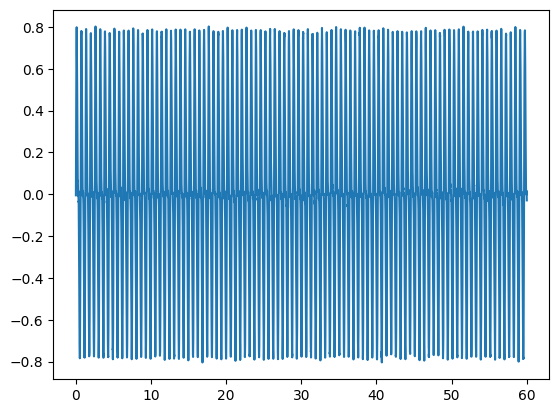

In [16]:
plt.plot(df["time"], df["ppg_signal"])
plt.show()

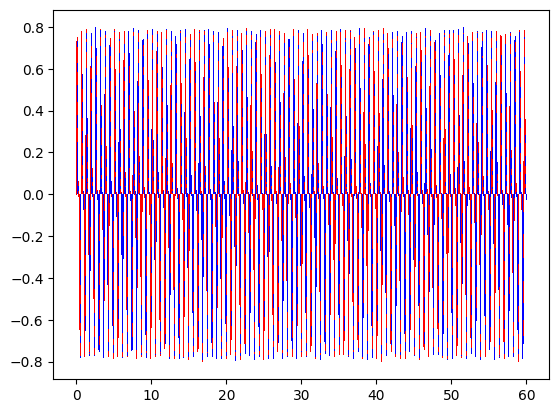

In [52]:
plt.bar(df["time"], df["ppg_signal"],width=0.1, color=['r','b'])
plt.show()

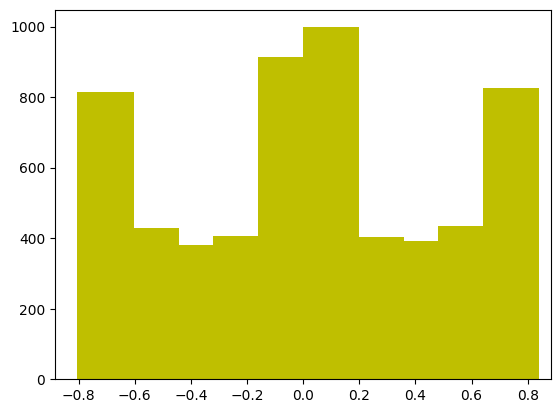

In [57]:
plt.hist(df["ppg_signal"],width=0.2, color='y')
plt.show()

In [23]:
import plotly.express as px
fig = px.line(df, x='time', y='ppg_signal')
fig.show()


In [32]:
fig2=px.histogram(df, x='time', y='ppg_signal')
fig2.show()

In [35]:
fig3=px.scatter(df, x='time', y='ppg_signal')
fig3.show()

Question:
Build a Linear Regression model to predict the final exam score of students based on their
study hours, attendance, and previous semester CGPA.

Predict the Final Score
Use features like Hours_Studied, Attendance_Rate, and Previous_Sem_CGPA to predict
Final_Score using Linear Regression.

Steps:
Common Preparation Steps (For All Tasks)
• Import necessary libraries
• Load the dataset
• Explore the data
1. Use df.info(), df.describe()
2. Check missing values with df.isnull().sum()
3. Plot distributions using sns.histplot() or df.hist()

• Select features and target
• Split data into training and test sets
• Train a Linear Regression model
• Predict and evaluate
• Plot actual vs predicted

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



In [63]:
df1=pd.read_excel('/content/student_dataset.xlsx')
df1


,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9
...,...,...,...,...,...,...,...,...,...
95,96,23,Female,1.1,76.6,9.51,113714,Yes,53.1
96,97,21,Female,1.7,77.0,7.53,114246,No,46.5
97,98,23,Male,7.2,81.9,9.13,35485,No,40.8
98,99,24,Male,5.0,86.3,6.60,64482,Yes,42.8


In [65]:
df1.shape

(100, 9)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Gender             100 non-null    object 
 3   Hours_Studied      100 non-null    float64
 4   Attendance_Rate    100 non-null    float64
 5   Previous_Sem_CGPA  100 non-null    float64
 6   Family_Income      100 non-null    int64  
 7   Part_Time_Job      100 non-null    object 
 8   Final_Score        100 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 7.2+ KB


In [67]:
df1.describe()

,Student_ID,Age,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Final_Score
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,21.210000,4.214000,76.41500,7.459900,81902.370000,67.907000
std,29.011492,1.913773,2.224293,14.43588,1.477141,35735.329886,19.655468
min,1.000000,18.000000,0.600000,50.30000,5.070000,21062.000000,35.900000
25%,25.750000,19.750000,2.300000,64.60000,6.247500,48019.250000,49.625000
50%,50.500000,21.000000,4.300000,78.10000,7.490000,81888.500000,67.000000
75%,75.250000,23.000000,6.225000,87.60000,8.750000,109449.250000,86.350000
max,100.000000,24.000000,7.900000,99.50000,9.950000,146174.000000,100.000000


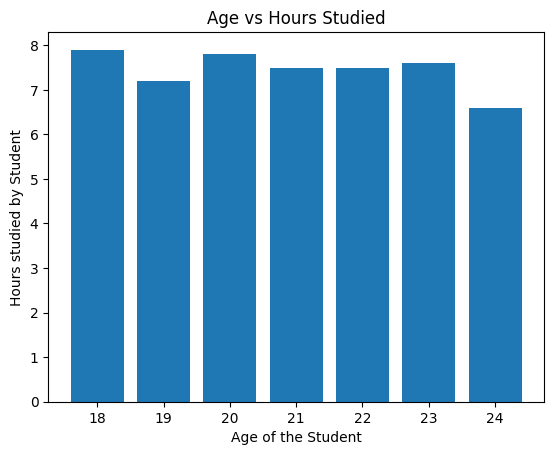

In [91]:
x='Age'
y='Hours_Studied'
plt.bar(df1[x],df1[y])
plt.title('Age vs Hours Studied')
plt.xlabel('Age of the Student')
plt.ylabel('Hours studied by Student')
plt.show()

In [ ]:
x='Age'
y='Final_Score'
plt.plot(df1[x],df1[y])
plt.title('Age vs Final Score')
plt.xlabel('Age of the Student')
plt.ylabel('Final Score of the Student')
plt.show()

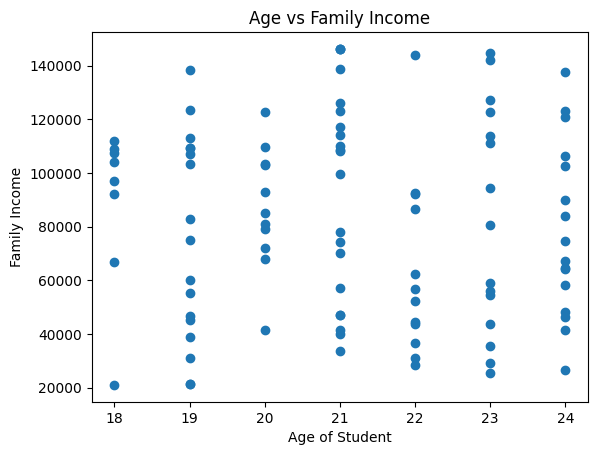

In [81]:
x='Age'
y='Family_Income'
plt.scatter(df1[x],df1[y])
plt.title('Age vs Family Income')
plt.xlabel('Age of Student')
plt.ylabel('Family Income')
plt.show()

In [99]:
fig1=px.histogram(df1, x='Hours_Studied', y='Previous_Sem_CGPA')
fig1.show()

In [87]:
fig1=px.line(df1, x='Hours_Studied', y='Final_Score')
fig1.show()

In [92]:
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

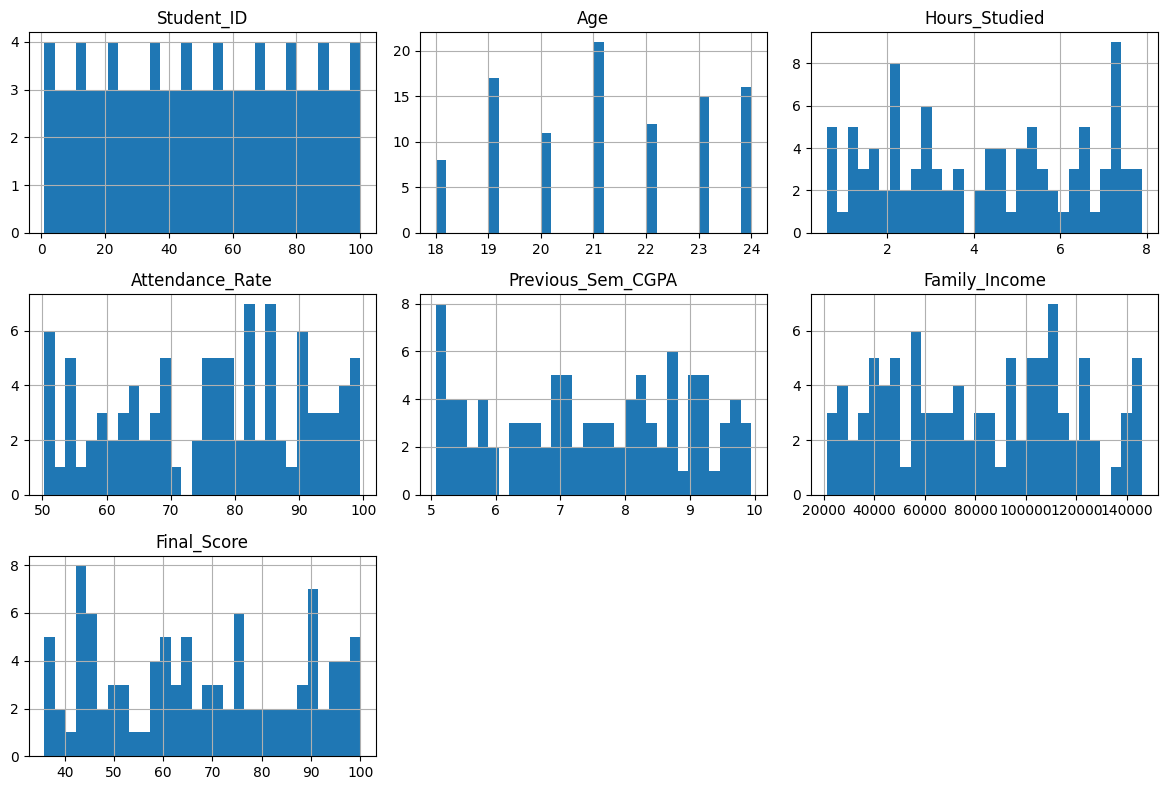

In [93]:
plt.figure(figsize=(10, 6))
df1.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

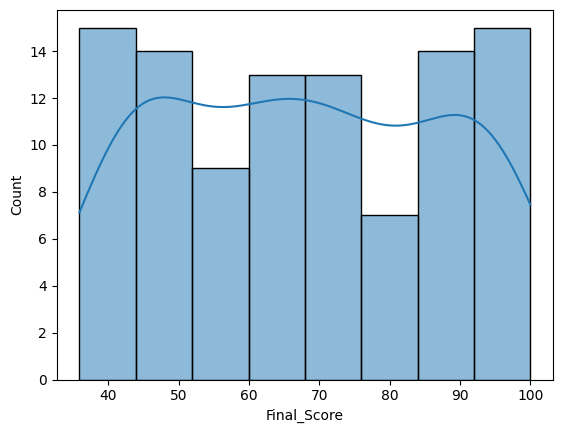

In [98]:
sns.histplot(df1['Final_Score'], kde=True)
plt.show()

In [121]:

numeric_df1 = df1.select_dtypes(include=[np.number])

y = numeric_df1['Final_Score']
X = numeric_df1.drop(columns='Hours_Studied')


In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [125]:
y_pred = model.predict(X_test)
print(y_pred)

[44.9 75.3 44.6 90.4 68.8 58.3 38.7 39.9 59.5 94.2 89.5 90.2 51.8 43.4
 78.4 74.9 67.  56.4 99.2 51.1]


In [127]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 0.00
R-squared Score: 1.00
